In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data=pd.read_csv("/Users/alok.g.v/Desktop/python practice/datasets/marketing_campaign.csv",sep='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

# ENROLLMENT DATES 

In [6]:
data['Dt_Customer']=pd.to_datetime(data["Dt_Customer"])
dates=[]
for i in data['Dt_Customer']:
    i=i.date()
    dates.append(i)
print("The Newest Customer's Enrollment Date :",max(dates))
print("The Oldest Customer's Enrollment Date :",min(dates))


The Newest Customer's Enrollment Date : 2014-12-06
The Oldest Customer's Enrollment Date : 2012-01-08


# CREATE A COLOUMN FOR HOW LONG THEY HAVE BEEN A CUSTOMER 

In [7]:
D=max(dates)
cust_for=[]
for i in dates:
    delta=D-i
    cust_for.append(delta)

data["customer_for"]=cust_for
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_for
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,971 days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,125 days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,472 days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,65 days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,321 days


In [8]:
data['customer_for'] = data.customer_for.astype(str).map(lambda x: x[:-4])


In [9]:
data["customer_for"] = pd.to_numeric(data["customer_for"], errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

# CATEGORIES IN MARITAL STATUS AND EDUCATION


In [10]:
print("Total of Categories in Marital Status \n",data['Marital_Status'].value_counts(),"\n")
print("Total of Categoris in Education \n",data["Education"].value_counts(),"\n")

Total of Categories in Marital Status 
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total of Categoris in Education 
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 



# Cleaning The Data for analysis



In [11]:

#Age Coloumn 
data["Age"]=2021-data["Year_Birth"]

#COLUMN TO KNOW WHETHER THE CUST IS LIVING ALONE OR WITH FAMILY 
data["Living_Status"]=data["Marital_Status"].replace({'Married':'Partner','Together':'Partner','Single':'Alone',
                                                     'Divorced':'Alone','Widow':'Alone','Absurd':'Alone','YOLO':'Alone'})

#COLUMN TO SHOW HOW MANY KIDS LIVING AT HOME
data["Children_AtHome"]=data['Kidhome']+data["Teenhome"]

#Total Family Members
data["Family_Size"]=data["Living_Status"].replace({'Alone':1,'Partner':2})

#SEGMENTING EDUCATION LEVEL INTO THREE GROUPS
data["Education"]=data["Education"].replace({'Graduation':'Graduate','PhD':'Postgraduate','Master':'Postgraduate',
                                            '2n Cycle':'Undergraduate','Basic':'Undergraduate'})

#FOR CLARITY 
data=data.rename(columns={'MntWines':'Wine','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish',
                         'MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
data['Total_Spent']=data['Wine']+data['Fruits']+data['Meat']+data['Fish']+data['Sweets']+data['Gold']

#Droping redundent Features 
drop_list=['Year_Birth','Marital_Status','ID','Z_CostContact','Z_Revenue','Dt_Customer']
data=data.drop(drop_list,axis=1)


In [12]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wine,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,customer_for,Age,Children_AtHome,Family_Size,Total_Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,512.006318,52.179603,0.947202,1.645307,607.075361
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,232.469034,11.985554,0.749062,0.478528,602.900476
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,1.000000,5.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,340.000000,44.000000,0.000000,1.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,513.000000,51.000000,1.000000,2.000000,396.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,686.000000,62.000000,1.000000,2.000000,1048.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1063.000000,128.000000,3.000000,2.000000,2525.000000


# RELATIVE PLOT FOR SOME FEATURES

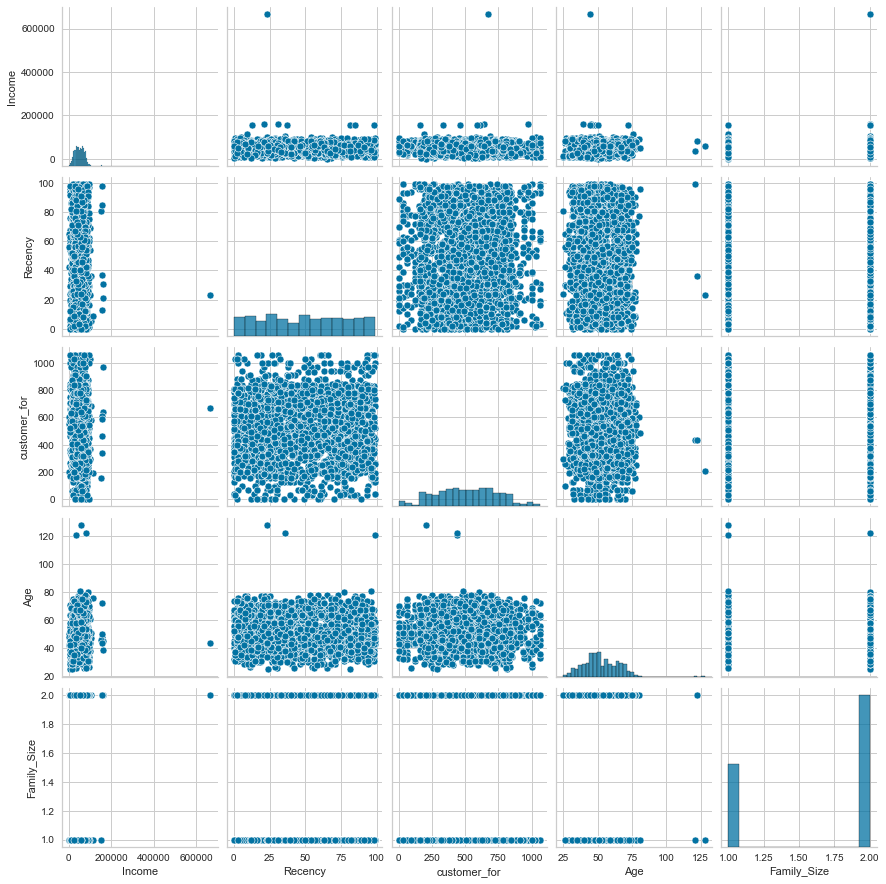

In [13]:
to_plot=["Income",'Recency','customer_for','Age','Family_Size',]
sns.pairplot(data[to_plot])

# WE CAN SEE SOME OUTLIERS IN AGE AND INCOME



In [14]:
data=data[(data['Age']<90)]
data=data[(data['Income']<60000)]


# HEATMAP / CORRELATION MATRIX



<AxesSubplot:>

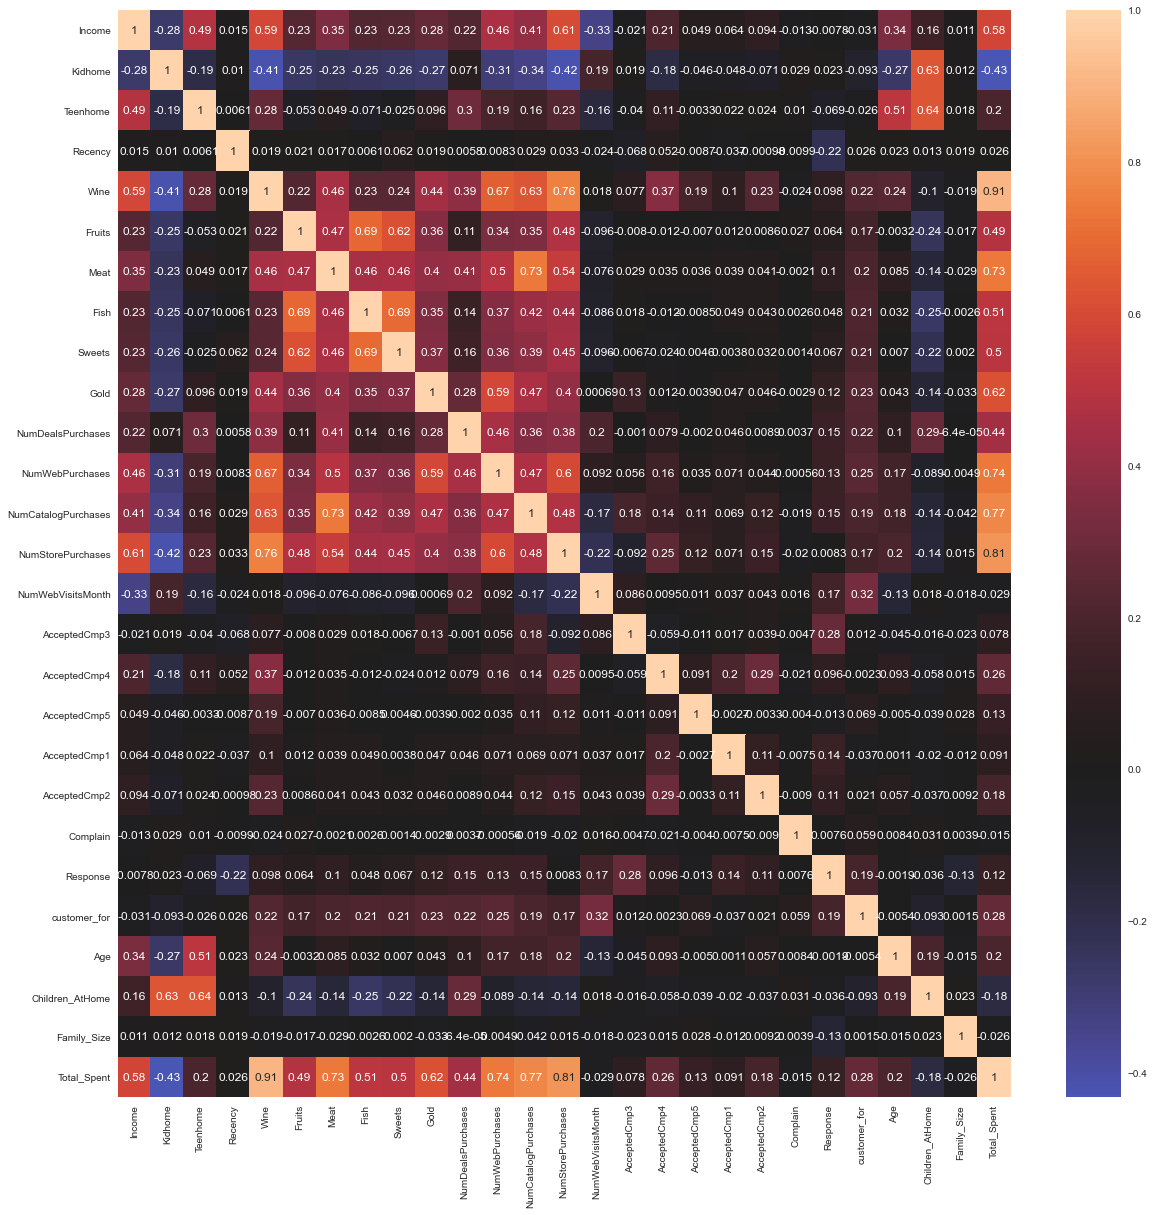

In [15]:

corrmat=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,center=0)

# DATA PREPROCESSING
## LABEL ENCODEING
## SCALING  FEATURES USING THE STANDARD SCALER
## CREATING SUBSET DATAFRAME FOR DIMENTIONALITY REDUCTION


In [16]:
b=(data.dtypes=='object')
object_cols=list(b[b].index)
print('The columns to be label encoded:',*object_cols)

The columns to be label encoded: Education Living_Status


In [17]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print('All the data is Numerical\n\n')

data[['Education','Living_Status']]

All the data is Numerical




,Education,Living_Status
0,0,0
1,0,0
3,0,1
4,1,1
6,0,0
...,...,...
2231,1,0
2232,0,0
2234,0,1
2237,0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1373 non-null   int64  
 1   Income               1373 non-null   float64
 2   Kidhome              1373 non-null   int64  
 3   Teenhome             1373 non-null   int64  
 4   Recency              1373 non-null   int64  
 5   Wine                 1373 non-null   int64  
 6   Fruits               1373 non-null   int64  
 7   Meat                 1373 non-null   int64  
 8   Fish                 1373 non-null   int64  
 9   Sweets               1373 non-null   int64  
 10  Gold                 1373 non-null   int64  
 11  NumDealsPurchases    1373 non-null   int64  
 12  NumWebPurchases      1373 non-null   int64  
 13  NumCatalogPurchases  1373 non-null   int64  
 14  NumStorePurchases    1373 non-null   int64  
 15  NumWebVisitsMonth    1373 non-null   i

# CREATING SUBSET DATAFRAME



In [19]:

ds=data.copy()
#DELETING COLUMNS REALATED TO COLUMNS 
del_cols=['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain']
ds=ds.drop(del_cols,axis=1)
ds

,Education,Income,Kidhome,Teenhome,Recency,Wine,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,customer_for,Age,Living_Status,Children_AtHome,Family_Size,Total_Spent
0,0,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,1,971,64,0,0,1,1617
1,0,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,125,67,0,2,1,27
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,65,37,1,1,2,53
4,1,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,321,40,1,1,2,422
6,0,55635.0,0,1,34,235,65,164,50,49,...,3,7,6,0,753,50,0,1,1,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1,44802.0,0,0,71,853,10,143,13,10,...,4,12,8,0,837,51,0,0,1,1049
2232,0,26816.0,0,0,50,5,1,6,3,4,...,0,3,4,0,841,35,0,0,1,22
2234,0,34421.0,1,0,81,3,3,7,6,2,...,0,2,7,0,698,47,1,1,2,30
2237,0,56981.0,0,0,91,908,48,217,32,12,...,3,13,6,0,315,40,0,0,1,1241


# SCALING 



In [20]:
scaler=StandardScaler()
ds_scaled=scaler.fit_transform(ds)
ds_scaled

array([[-0.91254541,  1.52325723, -1.20592303, ..., -1.73506257,
        -1.35961308,  4.80956342],
       [-0.91254541,  0.6173095 ,  0.65027912, ...,  1.16657069,
        -1.35961308, -0.73387371],
       [-0.91254541, -0.89577836,  0.65027912, ..., -0.28424594,
         0.73550337, -0.64322631],
       ...,
       [-0.91254541, -0.29854727,  0.65027912, ..., -0.28424594,
         0.73550337, -0.72341439],
       [-0.91254541,  1.4343831 , -1.20592303, ..., -1.73506257,
        -1.35961308,  3.49866256],
       [ 0.498406  ,  1.11852274,  0.65027912, ...,  1.16657069,
         0.73550337, -0.22834013]])

In [21]:
ds_scaled=pd.DataFrame(ds_scaled,columns=ds.columns)
ds_scaled

,Education,Income,Kidhome,Teenhome,Recency,Wine,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,customer_for,Age,Living_Status,Children_AtHome,Family_Size,Total_Spent
0,-0.912545,1.523257,-1.205923,-1.006623,0.312230,2.627764,4.554688,6.442559,6.030020,4.026980,...,5.050226,-0.105954,0.289815,2.834236,1.979503,1.164640,-1.359613,-1.735063,-1.359613,4.809563
1,-0.912545,0.617310,0.650279,0.836169,-0.383811,-0.605738,-0.472125,-0.556399,-0.450597,-0.446190,...,-0.102155,-0.961691,-0.758711,-0.352829,-1.680929,1.432742,-1.359613,1.166571,-1.359613,-0.733874
2,-0.912545,-0.895778,0.650279,-1.006623,-0.801435,-0.605738,-0.298787,-0.374945,-0.145627,-0.343358,...,-0.674642,-0.105954,-0.234448,-0.352829,-1.940534,-1.248279,0.735503,-0.284246,0.735503,-0.643226
3,0.498406,1.535163,0.650279,-1.006623,1.565103,0.233729,1.954612,0.895236,1.226739,0.890620,...,1.042818,0.749783,-0.758711,-0.352829,-0.832885,-0.980177,0.735503,-0.284246,0.735503,0.643269
4,-0.912545,1.330991,-1.205923,0.836169,-0.523019,0.555006,3.225760,1.491444,1.379224,2.021766,...,1.042818,1.177651,-0.234448,-0.352829,1.036271,-0.086503,-1.359613,-0.284246,-1.359613,1.228991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,0.498406,0.498862,-1.205923,-1.006623,0.764656,3.757417,0.047890,1.219262,-0.031263,0.016552,...,1.615305,3.316993,0.814078,-0.352829,1.399718,0.002864,-1.359613,-1.735063,-1.359613,2.829266
1369,-0.912545,-0.882720,-1.205923,-1.006623,0.033813,-0.636830,-0.472125,-0.556399,-0.412476,-0.291943,...,-0.674642,-0.533823,-1.282974,-0.352829,1.417025,-1.427014,-1.359613,-1.735063,-1.359613,-0.751306
1370,-0.912545,-0.298547,0.650279,-1.006623,1.112676,-0.647193,-0.356566,-0.543438,-0.298112,-0.394774,...,-0.674642,-0.961691,0.289815,-0.352829,0.798300,-0.354605,0.735503,-0.284246,0.735503,-0.723414
1371,-0.912545,1.434383,-1.205923,-1.006623,1.460697,4.042421,2.243509,2.178379,0.693041,0.119383,...,1.042818,3.744862,-0.234448,-0.352829,-0.858846,-0.980177,-1.359613,-1.735063,-1.359613,3.498663


# DIMENSIONALITY REDUCTION
## THE HIGHER THE NUMBER OF FEATURES HARDER IT IS TO WORK WITH 
## MANY FEATURES ARE CORRELATED HENCE REDUNDENT
'''DIMENTIONAL REDUCTION IS THE PROCESS OF REDUCING THE NUMBER OF RANDOM VARIABLES UNDERR CONCIDERATION
BY OBTAINING A SET OF PRINCIPLE VARIABLES'''


# PCA : PRINCIPLE COMPONENT ANALYSIS
## 1.REDUCE NUMBER OF DIMENTIONS
## 2.PLOTTING THE REDUCED DATAFRAME



# REDUCING DIMENTIONS OF FEATURES TO 3



In [22]:
pca=PCA(n_components=3)
ds_scaled=pca.fit_transform(ds_scaled)
PCA_ds=pd.DataFrame(ds_scaled,columns=['col1','col2','col3'])
print(PCA_ds)
PCA_ds.describe().T

           col1      col2      col3
0     11.547361  4.720347  1.905513
1     -1.723660 -2.037871  1.539142
2     -2.088712  0.761358 -1.157620
3      2.410770  0.851043 -1.530172
4      4.681105  0.977599  1.263779
...         ...       ...       ...
1368   5.226144  0.956823  1.634746
1369  -1.814735  2.337595  1.166081
1370  -2.152440  0.757442 -0.988335
1371   5.564006  1.512671  0.731592
1372   0.016473 -1.826886  0.172221

[1373 rows x 3 columns]


,count,mean,std,min,25%,50%,75%,max
col1,1373.0,-2.254003e-17,2.582053,-3.585320,-1.856853,-1.092804,1.401465,11.547361
col2,1373.0,-4.625255e-17,1.595528,-4.554608,-1.330452,0.041525,1.127285,6.683310
col3,1373.0,7.774796e-17,1.436548,-3.031226,-1.104622,-0.658602,1.423475,3.900470


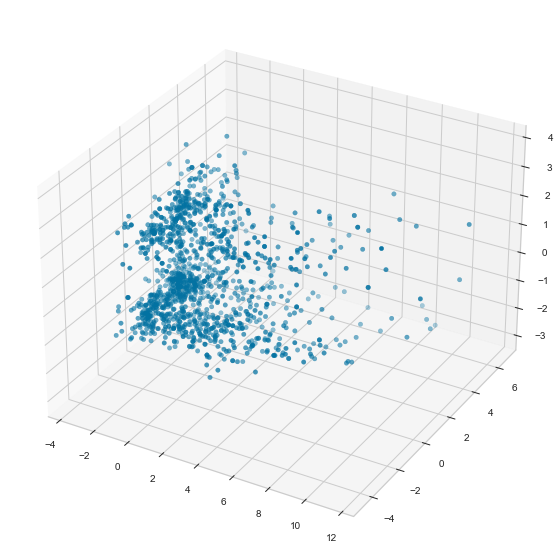

In [23]:
#plotting
x=PCA_ds['col1']
y=PCA_ds['col2']
z=PCA_ds['col3']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z,marker='o',cmap='RdBu')
plt.show()

# CLUSTERING
'''
AGGLOMERATIVE CLUSTERING IS A HEIRARCHICAL CLUSTERING METHOD
IT INVOLVES MERGING EXAMPLES UNTILLTHE DESIRED NUMBER OF CLUSTTER IS ACHIVED 

1. ELBOW METHORD TO DETERMINE THE NUMBER OF CLUSTERS TO BE FORMED 
2.CLUSTERING VIA AGGLOMERATIVE CLUSTERING
3.EXAMINE CLUSSTER VIA SCATTER PLOT


'''


In [24]:
# DETERMINING THE NUMBER OF CLUSTERS TO BE FORMED 



Elbow Method to determine the number of clusters to be formed:



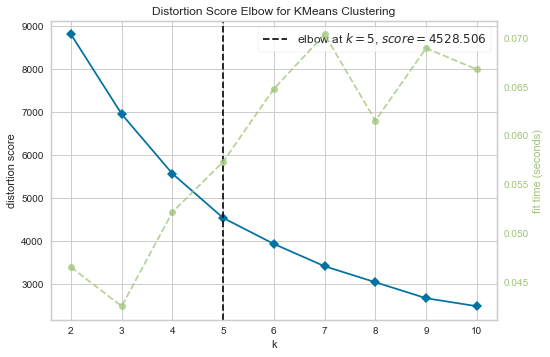

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
print('Elbow Method to determine the number of clusters to be formed:\n')
ELM=KElbowVisualizer(KMeans(),k=10)
ELM.fit(PCA_ds)
ELM.show()

# AGGLOMERATIVE CLUSTERING



In [26]:
agl=AgglomerativeClustering(n_clusters=4)
#FIT AND PREDICT MODEL
pred_agl=agl.fit_predict(PCA_ds)
PCA_ds['Clusters']=pred_agl
#Adding clusters to original data
data['Clusters']=pred_agl
pred_agl

array([1, 2, 0, ..., 0, 1, 3])

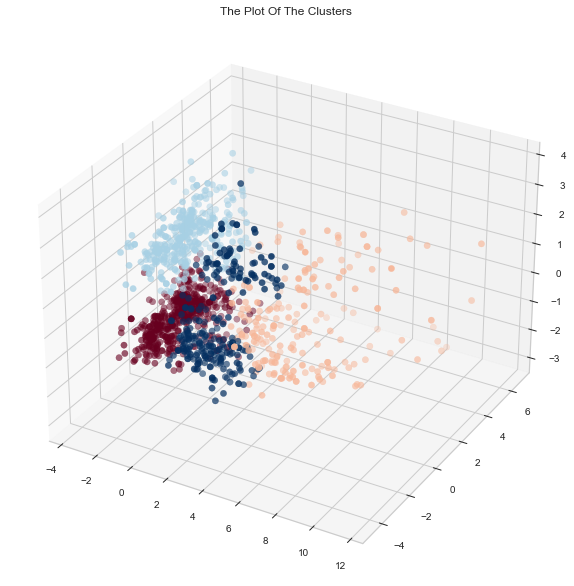

In [27]:
#SCATTER PLOT
fig=plt.figure(figsize=(10,12))
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=PCA_ds["Clusters"],marker='o',cmap='RdBu')
ax.set_title("The Plot Of The Clusters")
plt.show()

# EVALUATING THE MODEL
## STUDY THE PATTERNS OF THE CLUSTER 
## UNDERSATND THE NATURE OF THE CLUSTERS

Text(0.5, 1.0, 'Distribution Of The Clusters')

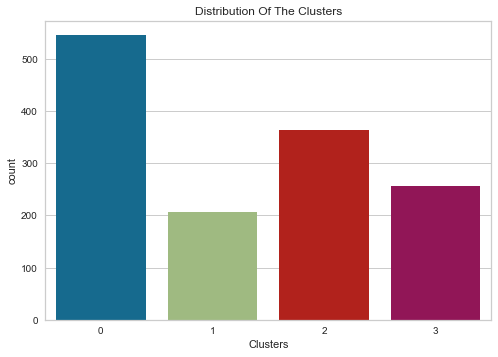

In [28]:
pal=["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
sl=sns.countplot(x=data['Clusters'])
sl.set_title("Distribution Of The Clusters")

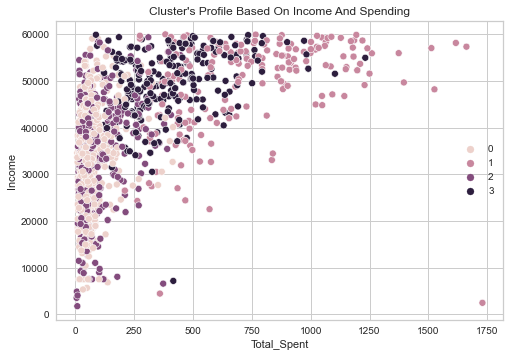

In [29]:
pl=sns.scatterplot(data=data,x=data['Total_Spent'],y=data['Income'],hue=data['Clusters'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()

# Group 0 : High to Low income but Low Expenditure
# Group 1 : High income and average Expenditure
# Group 2 : High to Avg income and low expenditure
# Group 3 : High Income and High Expenditure


/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


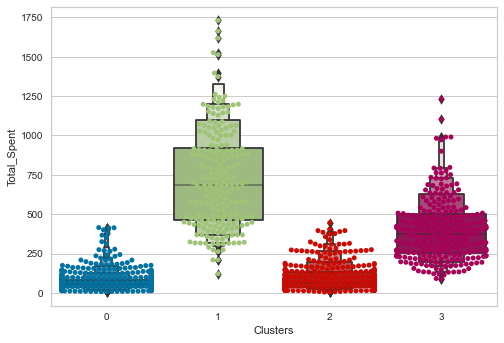

In [30]:
plt.figure()
ps=sns.swarmplot(x=data['Clusters'],y=data['Total_Spent'])
ps=sns.boxenplot(x=data['Clusters'],y=data['Total_Spent'])

/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


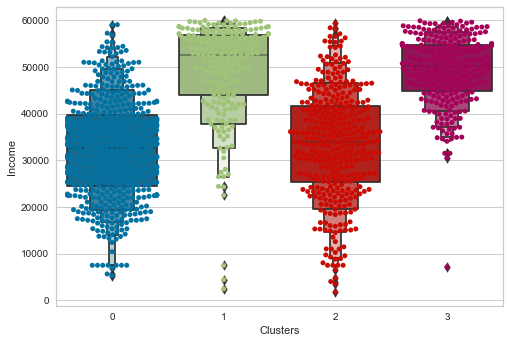

In [31]:
plt.figure()
ps=sns.swarmplot(x=data['Clusters'],y=data['Income'])
ps=sns.boxenplot(x=data['Clusters'],y=data['Income'])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1373 non-null   int64  
 1   Income               1373 non-null   float64
 2   Kidhome              1373 non-null   int64  
 3   Teenhome             1373 non-null   int64  
 4   Recency              1373 non-null   int64  
 5   Wine                 1373 non-null   int64  
 6   Fruits               1373 non-null   int64  
 7   Meat                 1373 non-null   int64  
 8   Fish                 1373 non-null   int64  
 9   Sweets               1373 non-null   int64  
 10  Gold                 1373 non-null   int64  
 11  NumDealsPurchases    1373 non-null   int64  
 12  NumWebPurchases      1373 non-null   int64  
 13  NumCatalogPurchases  1373 non-null   int64  
 14  NumStorePurchases    1373 non-null   int64  
 15  NumWebVisitsMonth    1373 non-null   i

0       0
1       0
3       0
4       0
6       0
       ..
2231    0
2232    0
2234    0
2237    1
2239    0
Name: Total_Promo, Length: 1373, dtype: int64


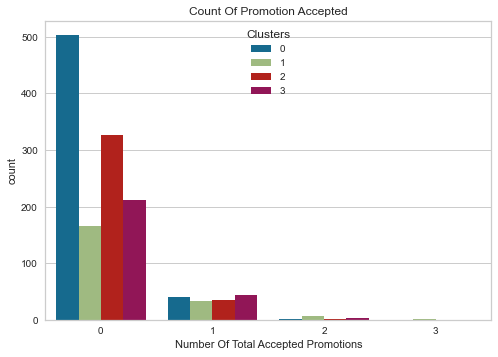

In [33]:
data['Total_Promo']=data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['AcceptedCmp1']+data['AcceptedCmp2']
print(data['Total_Promo'])
plt.figure()
pl=sns.countplot(x=data['Total_Promo'],hue=data['Clusters'])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.show()

# PLOTTING NUMBER OF DEALS PURCHASED 



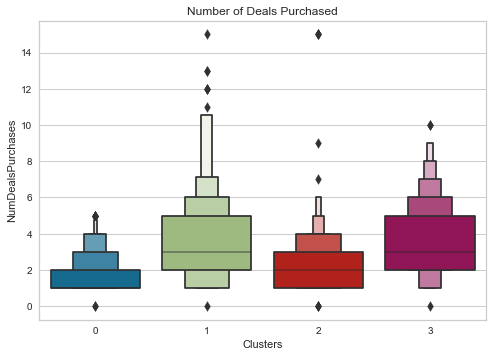

In [34]:
plt.figure()
pl=sns.boxenplot(y=data['NumDealsPurchases'],x=data['Clusters'])
pl.set_title("Number of Deals Purchased")
plt.show()

# PROFILING THE CLUSTERS


<Figure size 576x396 with 0 Axes>

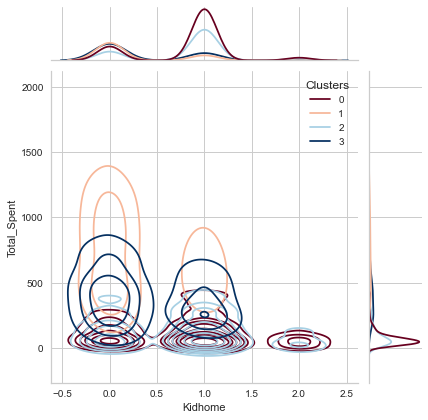

<Figure size 576x396 with 0 Axes>

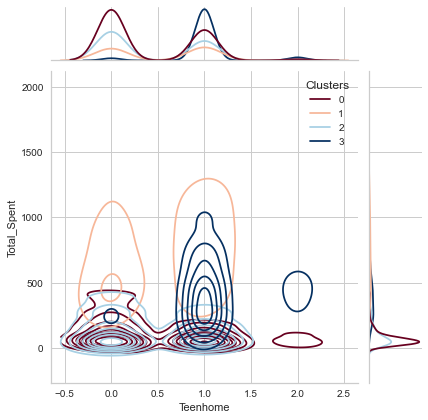

<Figure size 576x396 with 0 Axes>

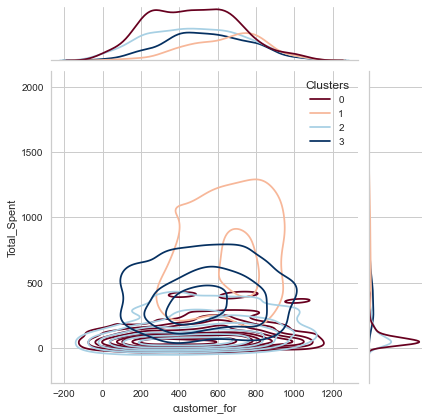

<Figure size 576x396 with 0 Axes>

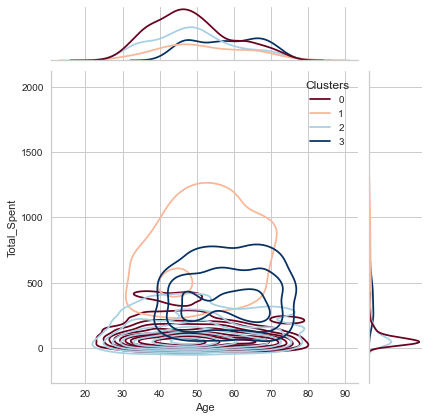

/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

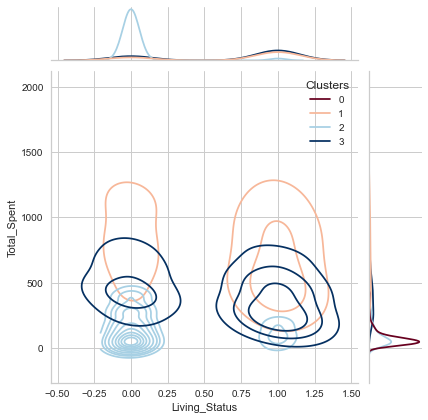

/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

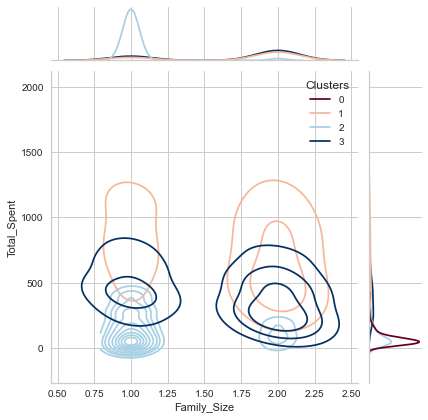

<Figure size 576x396 with 0 Axes>

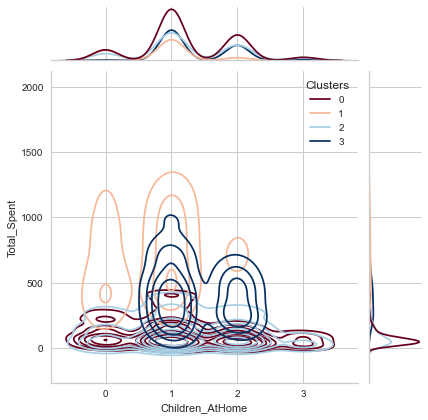

<Figure size 576x396 with 0 Axes>

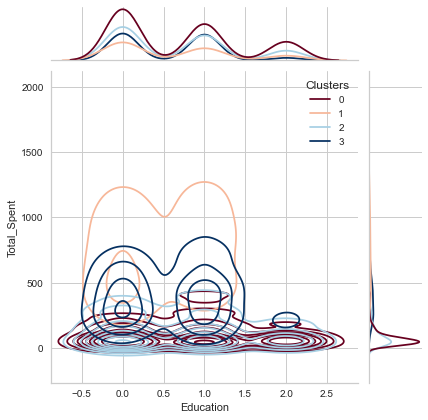

In [36]:
personal=['Kidhome','Teenhome','customer_for','Age','Living_Status','Family_Size','Children_AtHome','Education']

for i in personal:
    plt.figure()
    sns.jointplot(x=data[i],y=data['Total_Spent'],hue=data["Clusters"],kind='kde',palette='RdBu')
    plt.show()

/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 576x396 with 0 Axes>

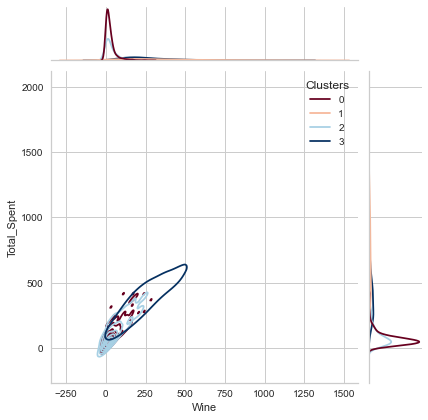

<Figure size 576x396 with 0 Axes>

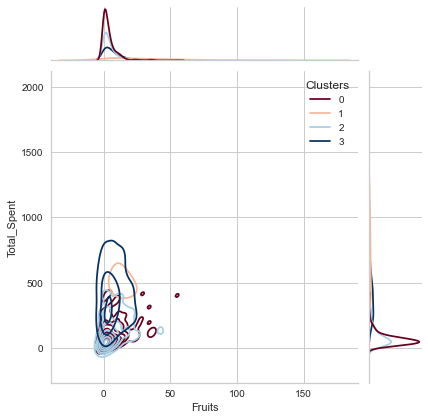

/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 576x396 with 0 Axes>

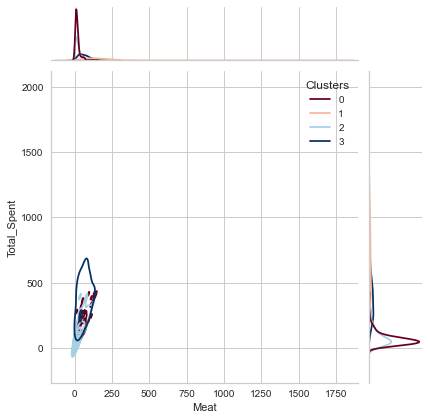

/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 576x396 with 0 Axes>

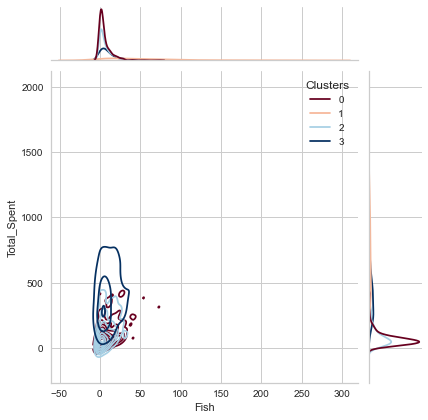

/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<Figure size 576x396 with 0 Axes>

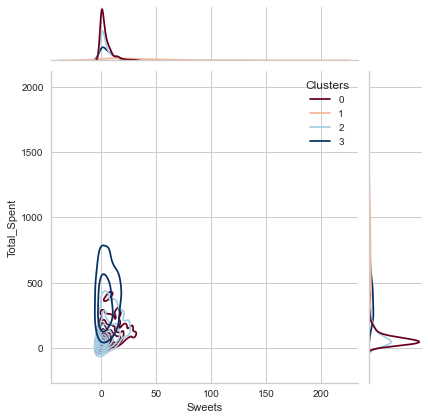

<Figure size 576x396 with 0 Axes>

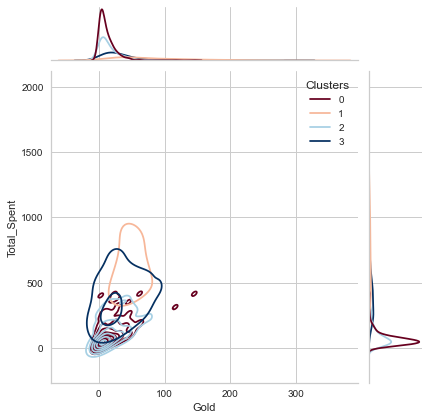

In [37]:
prod=['Wine','Fruits','Meat','Fish','Sweets','Gold']
for i in prod:
    plt.figure()
    sns.jointplot(x=data[i],y=data['Total_Spent'],hue=data["Clusters"],kind='kde',palette='RdBu')
    plt.show()